<b>Lab 5 - NLP</b>


umu-id: anth2786

<b>Part A</b> <br>
is based on code from: https://colab.research.google.com/drive/1zuq1I_FudtB2W4OSOWff8ODqfqK8d9-G
<br><br><b>Part B</b><br>
is based on code from the book Deep Learning With Python, Chollet F. chapter 6.2. Found here: https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb
<br>
Part B also contains predictions with code instpired from:<br>
https://towardsdatascience.com/simple-neural-network-sentiment-analyser-using-keras-179bc9f50fbc
<br>
http://drunkendatascience.com/simple-neural-network-sentiment-analyser-using-keras/
<br>
https://builtin.com/data-science/how-build-neural-network-keras

<br>
<b>VG Part</b><br>
The BERT model is not included in this. Trying out 4 different way, 2 ways (gave file errors, one demanded more time on the data handling (as it was not described in the exemple model).  
(Some code are still in this notebook, in the end)

In [1]:
import os

# Disable running on GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
# Nicely formatted time string
import time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

## Part A - Embedding and word2vec

In [3]:
from gensim.models import KeyedVectors

In [4]:
start_time = time.time()

EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Elapsed time: 0:00:40.40


In [5]:
word2vec["cat"].shape

(300,)

In [6]:
import numpy as np

# Make a function. cos(a,b) = (a dot b) / ( ||a|| * ||b|| )

def cos(x1, x2):
  return np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

In [7]:
# Lets check how close cat and dog are in the vector space

cos(word2vec["cat"], word2vec["dog"])

0.76094574

In [8]:
# Lets check how close cat and egplant are in the vector space. Should be further
# away (lower cos number)

cos(word2vec["cat"], word2vec["eggplant"])

0.11546826

###### Lets plot 100 words in a diagram

In [9]:
# Choose 100 random words

import random
vocab = random.sample(list(word2vec.vocab), 100)

In [10]:
X = np.array([word2vec[v] for v in vocab])

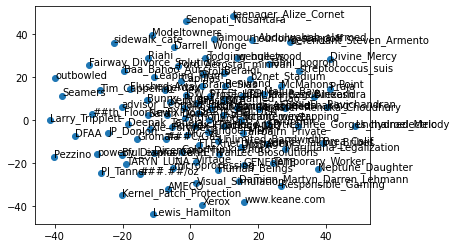

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)


Y = tsne.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(vocab, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [12]:
# Let's start by see where a movement takes us
# If we go from man to King and make an equivalent move from woman, where will it  
# take us

word2vec.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [13]:
# Let's check which words have best similarity to pregnant

word2vec.most_similar('pregnant')

[('pregnancy', 0.7064820528030396),
 ('pregant', 0.6582916378974915),
 ('Pregnant', 0.6250602006912231),
 ('miscarrying', 0.6189883947372437),
 ('collapse_Betsy_Sathers', 0.6159210205078125),
 ('Molly_Thornberg', 0.604171872138977),
 ('breastfeed', 0.5998175144195557),
 ('father_Moynahan_publicist', 0.5968271493911743),
 ('unborn_baby', 0.5936764478683472),
 ('preggers', 0.592155933380127)]

In [ ]:
# Looks good

In [18]:
# Let's try some other similar movement
# If we go from pregnant to mother, where will similar move from father take us?

word2vec.most_similar(positive=['father', 'mother'], negative=['pregnant'], topn=1)

[('uncle', 0.7730482220649719)]

In [19]:
# Let's try some other similar movement
# If we go from good to passive,  where will similar move from conscious take us?

word2vec.most_similar(positive=['conscious', 'passive'], negative=['good'], topn=5)

[('passively', 0.4318414330482483),
 ('concious', 0.4253477156162262),
 ('reactive', 0.4089198708534241),
 ('consciously', 0.38172537088394165),
 ('preconscious', 0.3749276399612427)]

In [20]:
# If hotdog is a dish in USA, what is a similar dish in Sweden?

word2vec.most_similar(positive=['sweden', 'hotdog'], negative=['usa'], topn=5)

[('hamburger', 0.5281333923339844),
 ('hotdogs', 0.5276503562927246),
 ('burger', 0.4839725196361542),
 ('wiener', 0.4822864830493927),
 ('sandwich', 0.47812312841415405)]

In [21]:
# If we have a relationship between sister and brother. What is the equivalent
# relationship for father

word2vec.most_similar(positive=['father', 'brother'], negative=['sister'], topn=5)

[('son', 0.7779923677444458),
 ('uncle', 0.7626983523368835),
 ('younger_brother', 0.7591934204101562),
 ('nephew', 0.7300765514373779),
 ('eldest_son', 0.699535608291626)]

In [22]:
# Let's try some verbs
# Swam - swimming gives Walked - ?

word2vec.most_similar(positive=['walked', 'swimming'], negative=['swam'], topn=5)

[('walking', 0.6744711995124817),
 ('walk', 0.6334099769592285),
 ('walks', 0.5541554689407349),
 ('Walking', 0.4588717818260193),
 ('Kareem_Shuman', 0.4470715820789337)]

In [23]:
# Dark -> stronger : strong -> ?

word2vec.most_similar(positive=['strong', 'stronger'], negative=['dark'], topn=5)

[('weaker', 0.590004563331604),
 ('strengthened', 0.5677163004875183),
 ('strengthening', 0.5273597836494446),
 ('robust', 0.5244174003601074),
 ('strongest', 0.5159147381782532)]

In [24]:
# Stronger -> dark : strong -> ?

word2vec.most_similar(positive=['strong', 'dark'], negative=['stronger'], topn=5)

[('bright', 0.4604077935218811),
 ('gray', 0.4363955855369568),
 ('inky_black', 0.43228602409362793),
 ('Dark', 0.41905760765075684),
 ('stuffy_cabins', 0.41465580463409424)]

In [25]:
# Let's try another verb
# strong -> stronger : dark -> ?

word2vec.most_similar(positive=['dark', 'stronger'], negative=['strong'], topn=5)

[('darker', 0.7023787498474121),
 ('blacker', 0.5634409785270691),
 ('darkened', 0.5231126546859741),
 ('brighter', 0.5117559432983398),
 ('paler', 0.49426209926605225)]

#### Analysis

We showed that similar words could be clustered. Eg similar words to pregnant is
('pregnancy', 0.7064820528030396),
 ('pregant', 0.6582916378974915),
 ('Pregnant', 0.6250602006912231),
 ('miscarrying', 0.6189883947372437),

Then when we "calculating" on relationships we get a rather good outcome. 3 out of 4 looking at common relationships<br>
<br>
<b>Good relationships</b><br>
&nbsp;    usa -> hotdog, sweden - ?hamburger<br>
&nbsp;    Swam - swimming gives Walked - ?walking<br>
&nbsp;    strong -> stronger : dark -> ?darker<br>
<br>
<b>Not so good relationsships</b><br>
&nbsp;    sister -> brother. father -> ?son<br>
<br>

But when we did input a difficult relationship, the model would make a <b>difficult estimation</b><br>


&nbsp;    good -> passive,  conscious -> ?Passivley<br>
&nbsp;    Dark -> stronger : strong -> ?weaker<br>
&nbsp;    Stronger -> dark : strong -> ?bright<br>
<br>
So the model's estimations are interesting but a little bit on the weak side

## Part B. IMDB on RNN and LSTM

# Understanding recurrent neural networks

This notebook contains the code samples found in Chapter 6, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

---

[...]

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [3]:
import keras
keras.__version__

'2.4.3'

In [4]:
from keras.layers import SimpleRNN
from keras.layers import Dense

There is just one minor difference: `SimpleRNN` processes batches of sequences, like all other Keras layers, not just a single sequence like 
in our Numpy example. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, 
input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. Let's take a look at an example:

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all intermediate layers to return full sequences:

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

print(y_train[0])
print(input_train[0])

print(y_train[100])
print(input_train[100])


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer:

In [11]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 77s 489ms/step - loss: 0.6547 - acc: 0.6005 - val_loss: 0.5035 - val_acc: 0.7684
Epoch 2/10
157/157 [==============================] - 76s 485ms/step - loss: 0.3978 - acc: 0.8329 - val_loss: 0.4028 - val_acc: 0.8242
Epoch 3/10
157/157 [==============================] - 76s 486ms/step - loss: 0.2834 - acc: 0.8868 - val_loss: 0.4381 - val_acc: 0.8326
Epoch 4/10
157/157 [==============================] - 76s 485ms/step - loss: 0.2056 - acc: 0.9225 - val_loss: 0.4521 - val_acc: 0.8018
Epoch 5/10
157/157 [==============================] - 76s 483ms/step - loss: 0.1453 - acc: 0.9460 - val_loss: 0.4829 - val_acc: 0.8118
Epoch 6/10
157/157 [==============================] - 76s 485ms/step - loss: 0.1017 - acc: 0.9661 - val_loss: 0.5346 - val_acc: 0.8212
Epoch 7/10
157/157 [==============================] - 76s 485ms/step - loss: 0.0703 - acc: 0.9766 - val_loss: 0.6044 - val_acc: 0.8100
Epoch 8/10
157/157 [==============================] - 7

Let's display the training and validation loss and accuracy

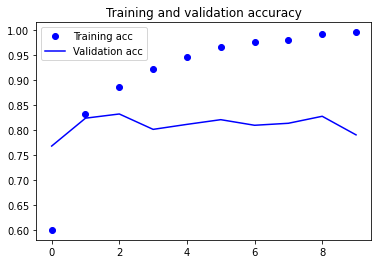

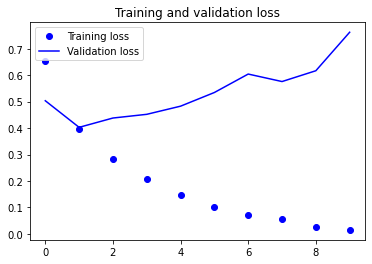

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences -- hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that SimpleRNN isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some more advanced layers.

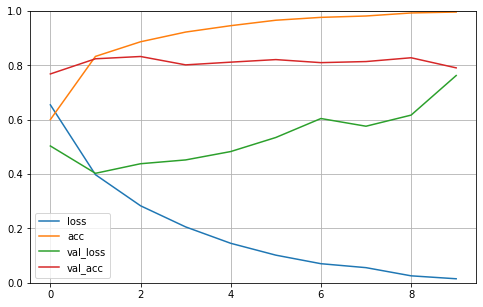

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
start_time = time.time()

score = model.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.7379931807518005
Test accuracy: 0.7904000282287598
Elapsed time: 0:00:39.72


## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [36]:
from keras.layers import LSTM

start_time = time.time()

model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history2 = model2.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 31s 199ms/step - loss: 0.5514 - acc: 0.7427 - val_loss: 0.3518 - val_acc: 0.8628
Epoch 2/10
157/157 [==============================] - 31s 195ms/step - loss: 0.3044 - acc: 0.8784 - val_loss: 0.3220 - val_acc: 0.8768
Epoch 3/10
157/157 [==============================] - 30s 194ms/step - loss: 0.2406 - acc: 0.9071 - val_loss: 0.2975 - val_acc: 0.8864
Epoch 4/10
157/157 [==============================] - 30s 194ms/step - loss: 0.2035 - acc: 0.9255 - val_loss: 0.2997 - val_acc: 0.8938
Epoch 5/10
157/157 [==============================] - 30s 194ms/step - loss: 0.1860 - acc: 0.9319 - val_loss: 0.3404 - val_acc: 0.8652
Epoch 6/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1621 - acc: 0.9415 - val_loss: 0.4042 - val_acc: 0.8628
Epoch 7/10
157/157 [==============================] - 30s 193ms/step - loss: 0.1487 - acc: 0.9469 - val_loss: 0.3890 - val_acc: 0.8692
Epoch 8/10
157/157 [==============================] - 3

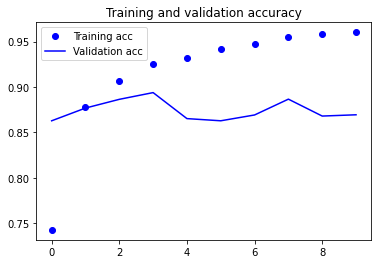

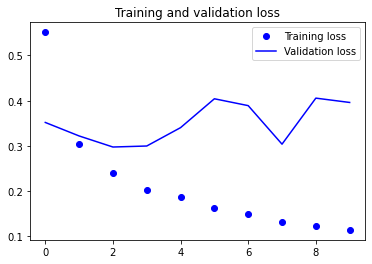

In [37]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

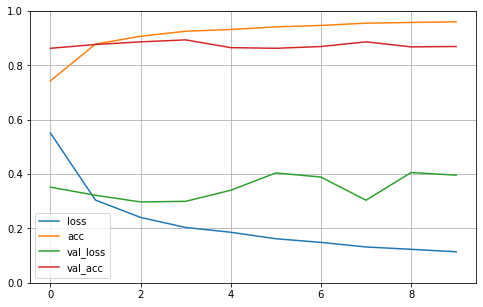

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
start_time = time.time()

score = model2.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.43439844250679016
Test accuracy: 0.8565199971199036
Elapsed time: 0:00:18.60


## Let's implement some models based on the data above from Chollet

###### Implement Early stopping on the simple RNN

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LSTM

In [40]:
start_time = time.time()

# Looking at the earlier graph, we are using 0 patiance
early_stopping3 = EarlyStopping(
    patience=0,
    mode='auto')


model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(SimpleRNN(32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
            callbacks=[early_stopping3])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 14s 90ms/step - loss: 0.6114 - acc: 0.6708 - val_loss: 0.5297 - val_acc: 0.7802
Epoch 2/10
157/157 [==============================] - 15s 93ms/step - loss: 0.4047 - acc: 0.8417 - val_loss: 0.3780 - val_acc: 0.8436
Epoch 3/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2886 - acc: 0.8840 - val_loss: 0.4927 - val_acc: 0.7578
Elapsed time: 0:00:44.77


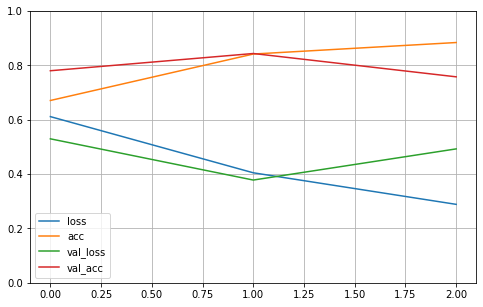

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
start_time = time.time()

score = model3.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.48372167348861694
Test accuracy: 0.763480007648468
Elapsed time: 0:00:09.08


###### Short analysis (more later)

A rather low test accuracy with high loss. The model semms to perform better after only one epoch, looking at the graphs. It quickly became overfitted

###### Implement LSTM(32) with early stopping

In [43]:
start_time = time.time()

# Looking at the earlier graph, we are using 1 patiance
early_stopping4 = EarlyStopping(
    patience=1,
    mode='auto')

model4 = Sequential()
model4.add(Embedding(max_features, 32))
model4.add(LSTM(32))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history4 = model4.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
            callbacks=[early_stopping4])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 32s 204ms/step - loss: 0.5136 - acc: 0.7534 - val_loss: 0.3468 - val_acc: 0.8650
Epoch 2/10
157/157 [==============================] - 30s 193ms/step - loss: 0.2944 - acc: 0.8858 - val_loss: 0.3945 - val_acc: 0.8320
Elapsed time: 0:01:04.77


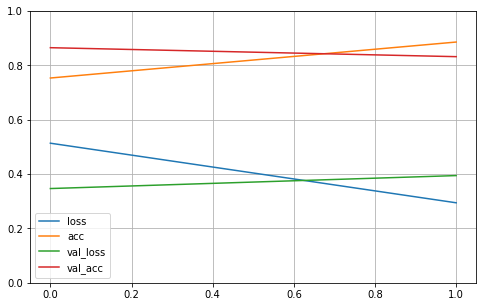

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
start_time = time.time()

score = model4.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.3930627405643463
Test accuracy: 0.8315200209617615
Elapsed time: 0:00:19.50


###### Short analysis (more later)

The basic LSTM outperformed the Simple RNN directly. Still high loss on the test set. The validation accuracy becomes worse the more epoch the model run

###### Implement LSTM(128) with early stopping

In [46]:
start_time = time.time()

# Using the same 1 patiance, as LSTM(32)
early_stopping5 = EarlyStopping(
    patience=1,
    mode='auto')

model5 = Sequential()
model5.add(Embedding(max_features, 32))
model5.add(LSTM(128))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history5 = model5.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
            callbacks=[early_stopping5])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 124s 791ms/step - loss: 0.5364 - acc: 0.7397 - val_loss: 0.3344 - val_acc: 0.8616
Epoch 2/10
157/157 [==============================] - 134s 853ms/step - loss: 0.3563 - acc: 0.8530 - val_loss: 0.3159 - val_acc: 0.8766
Epoch 3/10
157/157 [==============================] - 136s 866ms/step - loss: 0.2891 - acc: 0.8898 - val_loss: 0.3067 - val_acc: 0.8750
Epoch 4/10
157/157 [==============================] - 136s 869ms/step - loss: 0.2363 - acc: 0.9125 - val_loss: 0.6423 - val_acc: 0.8276
Elapsed time: 0:08:55.64


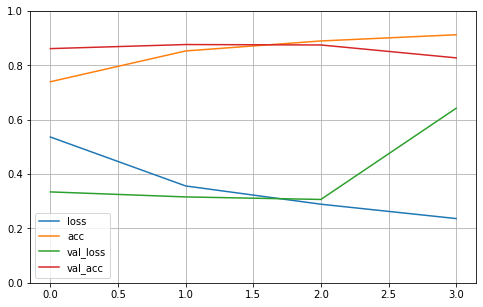

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
start_time = time.time()

score = model5.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.6742952466011047
Test accuracy: 0.8130000233650208
Elapsed time: 0:00:59.26


###### Short analysis (more later)

Easily overfitted with a high test loss.

###### Implement BiDir LSTM(32) with early stopping

In [13]:
start_time = time.time()

# Using the same 1 patiance, as LSTM(32)
early_stopping8 = EarlyStopping(
    patience=0,
    mode='auto')

model8 = Sequential()
model8.add(Embedding(max_features, 32))
model8.add(keras.layers.Bidirectional(LSTM(32)))
model8.add(Dense(1, activation='sigmoid'))

model8.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history8 = model8.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
            callbacks=[early_stopping8])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/10
157/157 [==============================] - 69s 441ms/step - loss: 0.5773 - acc: 0.7084 - val_loss: 0.5011 - val_acc: 0.7652
Epoch 2/10
157/157 [==============================] - 67s 430ms/step - loss: 0.3561 - acc: 0.8543 - val_loss: 0.3111 - val_acc: 0.8730
Epoch 3/10
157/157 [==============================] - 65s 413ms/step - loss: 0.2618 - acc: 0.8996 - val_loss: 0.2962 - val_acc: 0.8772
Epoch 4/10
157/157 [==============================] - 64s 410ms/step - loss: 0.2197 - acc: 0.9211 - val_loss: 0.2990 - val_acc: 0.8764
Elapsed time: 0:04:31.41


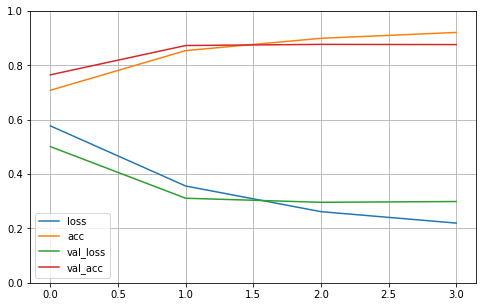

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history8.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
start_time = time.time()

score = model8.evaluate(input_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.3078640401363373
Test accuracy: 0.8717600107192993
Elapsed time: 0:00:22.65


#### Analysis

SimpleRNN 32
Test loss: 0.48372167348861694<br>
Test accuracy: 0.763480007648468<br>
<br>   
LSTM 32<br>
Test loss: 0.3930627405643463<br>
Test accuracy: 0.8315200209617615<br>
<br>    
LSTM 128<br>
Test loss: 0.3930627405643463<br>
Test accuracy: 0.8315200209617615<br>
<br>    
Bidir LSTM 32<br>
Test loss: 0.3078640401363373<br>
Test accuracy: 0.8717600107192993<br>
<br>

The simpleRNN model was "simple" and performed worst. LSTM models outperformed the simpleRNN. Whether having 32 or 128 neurons/units in the model, did not make any difference, but running a Bidirectional LSTM got made a difference. 
<br>
The Bidir LSTM 32 achieve the highest accuracy on the test data (0,87) as well as lowest test loss (0,31)
<br>

###### Let's make a test on new test senteces

Code inspired from:<br>
https://towardsdatascience.com/simple-neural-network-sentiment-analyser-using-keras-179bc9f50fbc
<br>
http://drunkendatascience.com/simple-neural-network-sentiment-analyser-using-keras/
<br>
https://builtin.com/data-science/how-build-neural-network-keras



In [17]:
from keras.preprocessing import sequence
import string
import numpy as np

max_features = 10000
maxlen = 500
word_dict = imdb.get_word_index() 

def analyze(text, modelnumber, debug = False): 
    # Prepare the input by removing punctuation characters, converting characters 
    # to lower case, and removing words containing numbers 
    
    translator = str.maketrans('', '', string.punctuation) 
    text = text.translate(translator) 
    text = text.lower().split(' ') 
    text = [word for word in text if word.isalpha()] 
    if debug: print(text)
    
    #padded_input = ""
    
    # Generate an input tensor 
    
    input = [1] 
    for word in text: 
        if word in word_dict and word_dict[word] < max_features: 
            input.append(word_dict[word]) 
            if debug: print(word_dict.get(word))
        else: 
            input.append(2)  
        
        
    padded_input = sequence.pad_sequences([input], maxlen=maxlen) 
        
    # Invoke the model and return the result 
    if debug: print(padded_input)
    
    if modelnumber == 1:
        result = model.predict(np.array([padded_input][0]))[0][0]
    if modelnumber == 2:
        result = model2.predict(np.array([padded_input][0]))[0][0]
    if modelnumber == 3:
        result = model3.predict(np.array([padded_input][0]))[0][0]
    if modelnumber == 4:
        result = model4.predict(np.array([padded_input][0]))[0][0]
    if modelnumber == 5:
        result = model5.predict(np.array([padded_input][0]))[0][0]
    if modelnumber == 6:
        result = model8.predict(np.array([padded_input][0]))[0][0]

    return result

In [18]:
def decode(text):
    index = imdb.get_word_index()
    reverse_index = dict([(value, key) for (key, value) in index.items()]) 
    decoded = " ".join( [reverse_index.get(i - 3, "#") for i in text] )
    return decoded

In [58]:
test_sentences = [
  "That movie was absolutely awful",
  "This is a bad review, terrible, I hate Huffington Post",
  "This movie is not worth the money",
  "The only positive thing with this movie is the music",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "This movie is worth the money",
  "I loved the movie. I just have to see it",
  "best ever I must say it is lovely",
  "This is a must see",
  "This is a great review, an amazing blog, I love Huffington Post",
  "Absolutely fantastic!"   
]

for i in range (1,7):
    for s in test_sentences:
        score = analyze(s,i)
        print("model ",i, "  score: {:.2f} :".format(score) , s)
    print(" ")

test_sentences = [
  "That movie was absolutely awful",
  "This movie is not worth the money",
  "The only positive thing with this movie is the music",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!"   
]

print(" ")
print(" ")
for s in test_sentences:
    score = analyze(s,6)
    print("model 6  score: {:.2f} :".format(score) , s)


model  1   score: 0.00 : That movie was absolutely awful
model  1   score: 0.23 : This is a bad review, terrible, I hate Huffington Post
model  1   score: 0.90 : This movie is not worth the money
model  1   score: 0.95 : The only positive thing with this movie is the music
model  1   score: 0.03 : The acting was a bit lacking
model  1   score: 0.03 : The film was creative and surprising
model  1   score: 0.96 : This movie is worth the money
model  1   score: 0.76 : I loved the movie. I just have to see it
model  1   score: 0.98 : best ever I must say it is lovely
model  1   score: 0.00 : This is a must see
model  1   score: 0.02 : This is a great review, an amazing blog, I love Huffington Post
model  1   score: 0.14 : Absolutely fantastic!
 
model  2   score: 0.09 : That movie was absolutely awful
model  2   score: 0.37 : This is a bad review, terrible, I hate Huffington Post
model  2   score: 0.79 : This movie is not worth the money
model  2   score: 0.35 : The only positive thing wit

<b>The Model called 6 above and below is equivalent to model 8 (Bidir LSTM 32)</b>
<br>
The Bidir model seems to perform best. The Sentences are set from worst (top) to best (bottom). It is not a clear cut estimation of the model. Though the there seems to be higher values further down. But "Absolute fantastic" should have a better score.<br><br>
The sentence "This movie is not wirth the money", get a much higher score than it should. Probably because the "not" is not ranked as it should in the sentence. It is also possible that sentences in the training data is not usually phrased that way.<br><br>
Looking only at the last 6 sentences that should be evaluated, it is the "not worth the money" that stands out. Otherwise the 50% better sentences had better scores, then the 50% wors sentences. But the ranking among the better senteces was not that good.




######  NON IN THE TASK (for fun) Some movie review

In [19]:
test_sentences = [
  "Longer than the Gotterdammerung… and not nearly as funny!” Noël Coward is reputed to have quipped on seeing the protracted (four and a half hour) world premiere of Lerner and Loewe’s Camelot in Toronto in 1960.Afflicted by director Moss Hart having a heart attack and Lerner getting a stomach ulcer, the pair’s arduously achieved follow-up to My Fair Lady was duly pruned and – graced by Richard Burton as King Arthur and Julie Andrews as Guenevere – did respectable business on Broadway, during which time it acquired the boosting fandom of JFK. Yet even at the time it looked much inferior to their earlier masterpiece. And even running now at just 80 minutes in an outdoor concert staging at the Watermill, it feels like it’s all moat and no castle. Caught twixt jest and earnest, pre-Python but aware of chivalry’s pomposity, song after song trots by, tilting between effortful comedy and chaste emoting. It’s soporific stuff; were it not for the fresh air I’d have slept-a-lot.No question, it’s a miracle that in a matter of weeks director Paul Hart has marshalled and rehearsed a company of 10 (the majority actor-musicians) and ensured they can take their place in a socially distanced way on a pavilion-style stage festooned with coats of arms and fairy-lights. I salute the collective effort and applaud individual contributions. As Guenevere, Caroline Sheen has a presence and voice as gleaming as a polished goblet. Her real-life husband Michael Jibson – an Olivier-winning King George in Hamilton – exudes an essential Arthurian decency even if, in his suited attire, he hardly looks battle-ready. Marc Antolin’s conceited Lancelot has his moments, too. It’s largely (understandably) a script in hand affair, but the problem is the by-the-book nature of the material. That holy grail of musicals, a vital raison d’etre, is missing.",
  "With more than 40 live-action versions of A Christmas Carol already in the can, what the Dickens is left to be done with it? Sibling filmmakers Jacqui and David Morris, who directed 2018’s superb Nureyev documentary, have come up with a compelling new angle: a danced-through version of the fable, performed in a stage-like space by a specially convened troupe, and with the characters’ voices supplied by an all-star (though off-screen) cast. The result is a mostly beguiling, intermittently jarring hybrid – much closer to “normal” cinema than, say, a straightforward screening of a play, but with a certain frisson of live-ness that works in its favour more often than not. Aimed squarely at families, it’s also one for children (and adults) who are already familiar with the original Charles Dickens novella – or, failing that, perhaps the immortal Alastair Sim and/or Muppets-led adaptations thereof. The appeal of this new Christmas Carol is rooted in its own particular adaptational choices: the sets that resemble grisly, Gustave Doré-like etchings, or the intermingling of ballet and body-popping, all captured by a camera that weaves between the dancers like a ghostly understudy just as often as it withdraws to a more conventional vantage point in the stalls. Siân Phillips plays the narrator, reading aloud from the original Dickens – or at least a well-whittled digest. The scene is a Victorian parlour, where two children are re-enacting the tale in their model theatre for their parents and younger sister, the latter of whom watches the whole thing come to life before her eyes. It really takes off when Michael Nunn’s Scrooge, voiced by Simon Russell Beale with (intentional or otherwise) nods to Sim, returns to his gloomy suite of rooms and encounters Marley’s ghost – who is danced by Russell Maliphant and voiced by Andy Serkis with such harmonious, blood-curdling gusto that it almost justifies the film’s voice-and-body-splitting gambit in one fell swoop. Serkis is so good, in fact, that he makes you crave another live-action version in which he’s physically present – that is, in addition to last year’s Peaky Blinders-inflected BBC version, in which he played the Ghost of Christmas Past. A Christmas Carol Martin Freeman also makes a convincing voice of Bob Cratchit, because of course he does, though alas, many of the other pairings just don’t mesh smoothly enough to prevent the device itself from feeling awkwardly conspicuous. Daniel Kaluuya doesn’t provide the jovial boom implied by Mikey Boats’s strapping Ghost of Christmas Present, while Carey Mulligan barely registers as the voice of Scrooge’s great lost love Belle, who is danced with great delicacy and warmth by Grace Jabbari.In fact, the most effective sequences here tend to be the ones least driven by dialogue: Marley’s ghost wrestling with his chains; the foretold death of Tiny Tim; the energised ensemble bustle of the London streets. Immersive rather than absorbing, it’s a film that makes you pine for the theatre, where this kind of offbeat treatment tends to land with fewer bumps.",
  "Before I point out the bleeding obvious – namely that Six is a marvellous show, dripping with invention and intelligence, and one which brings not just happiness in the moment but hope for the future of the British musical – I need to attack the fatuous. Its composers Toby Marlow and Lucy Moss completed their witty, magpie-minded sonic onslaught on behalf of Henry VIII’s wives while in their final year at Cambridge (2016-17); it has since become a theatrical phenomenon and they deserve the riches, opportunities and acclaim that have come their way.  Cambridge University, you will be aware, has recently been at the centre of a freedom of speech storm. The governing body has just voted – crucially – for “tolerance” of differing views rather than required “respect” for them, a means of upholding/ensuring academic freedom and fairness. That message should be instinctive to the university’s graduate diaspora and amplified by it. But in a lamentable episode last month, Marlow and Moss cancelled an interview with Graham Norton on his Radio 2 programme because they “didn’t feel comfortable being on the same billing as JK Rowling”; they were reluctant to “feature as guests on a show where she is promoting her work until she has made significant efforts to make amends with the trans community”.  A snub, then; a quasi-boycott. Given that Six has transferred from the Arts to the (beautifully refurbished) Lyric, you wonder how they sleep at night; after all, it’s only a short stroll along Shaftesbury Avenue to another Nimax theatre, the Palace, home to the (Covid-suspended) Harry Potter. Eek! I jest. But, seriously, theatre upholds diversity of opinion and the right to dissent, or it is nothing. There’s an onus on those who work in it to fight against, not uphold, cancel culture. Minor though it might seem to disdain contact with a fellow writer – and Rowling is insulated by her queenly wealth – it’s part of a trend of treating even reasoned opinions as heretical, worthy of excommunication. And there’s an added irony here. Laying aside the fact that Henry’s appalling record as marriage material stemmed from the perceived usefulness – or otherwise – of his spouses as reproductive vessels, the winning thrust of Six is about letting muted, marginalised (female) voices be heard. Amy Shaw in Six at the Lyric Theatre Credit: Pamela Raith The evening is an 80-minute irreverent blast from the past aimed at setting the record straight. The format is mock Tudor talent-show, with us in the imaginary position of Simon Cowell-like judges. The sextet (in combatively playful, period-allusive attire – think Vivienne Westwood meets Valkyries) vie with each other, via vocal prowess and potted autobiography, to assert their claim to have had it the worst, and gain victimhood’s crown. There’s ample room, then, for comic cat-fights – preening, posturing and backchat. But the superficial bling carries a deeper sting. Who, actually, did suffer the most? Is it no contest if you got beheaded? What about the broken heart, the dashed romantic dreams, the death caused by child-birth? Taking modish liberties to articulate the real experience of these corseted characters, the show demands we put ourselves in their restrictive place: would their mindsets – their outrage, their hurt – be so very far removed from that of their sisters today? History is flipped on its head to become herstory and you’re left wondering if Henry’s fame owes much, if not all, to them (his reign in fact the sideshow). The production (directed by Moss, and Jamie Armitage) is more polished than ever – the choreography and lighting so synchronised it’s like the deftest human embroidery. None of the cast (invidious to single them out) misses a beat – or impish wink – as they hurtle through Hamilton-like rap, heart-stopping soul, Hi-NRG beats and girl-power anthems. Covid alas prevented Broadway from seeing Six – the curtain fell on opening night. Albeit the guillotine of Tier 3 hangs over London, the West End can still be royally pleased with itself for pulling off this riotous, life-affirming act of restoration"
]

# 2 star: https://www.telegraph.co.uk/theatre/what-to-see/camelot-watermill-theatre-newbury-review-medieval-musical-moat/
# 3 star: https://www.telegraph.co.uk/films/0/christmas-carol-review-simon-russell-beale-raises-ghost-festive/
# 5 star: https://www.telegraph.co.uk/theatre/what-to-see/six-lyric-theatre-review-beacon-hope-future-british-musicals/


print(" ")
print(" ")
for s in test_sentences:
    score = analyze(s,6)
    print("model 6  score: {:.2f}".format(score))


 
 
model 6  score: 0.07
model 6  score: 0.24
model 6  score: 0.07


###### Analysis
The model could not be used on long reviews. The 2 star and 5 star review got the same score


In [21]:
# Just headlines

test_sentences = [
  "This outdoor concert staging is a valiant effort under difficult circumstances – but this 1960 musical isn't worth resurrecting",
  "In this danced version of Dickens’s tale, Russell Beale, Martin Freeman and Carey Mulligan remind us on screen what we’re missing on stage",
  "This marvellous mock-Tudor musical celebrates muted female voices – a lesson its composers should apply in their own lives"
]

# 2 star: https://www.telegraph.co.uk/theatre/what-to-see/camelot-watermill-theatre-newbury-review-medieval-musical-moat/
# 3 star: https://www.telegraph.co.uk/films/0/christmas-carol-review-simon-russell-beale-raises-ghost-festive/
# 5 star: https://www.telegraph.co.uk/theatre/what-to-see/six-lyric-theatre-review-beacon-hope-future-british-musicals/


print(" ")
print(" ")
for s in test_sentences:
    score = analyze(s,6)
    print("model 6  score: {:.2f}".format(score))


 
 
model 6  score: 0.50
model 6  score: 0.74
model 6  score: 0.27


###### Analysis
Looking only at intros, the scores where more differentiated, but this time the 5 star review got the lowest sentoment

######  NON IN THE TASK (for fun) Some Tweets

In [23]:
test_sentences = [
  "I had a GREAT week, thanks to YOU! If you need anything, please reach out. ❤️ ❤️ ❤️ #WorldSmileDay pic.twitter.com/ZpVmQPmcyc", 
  "My heart goes out to the Malaysian people. This is such a tragedy. Words can't express how sad it is. I wish we could just have peace. #MH17",
  "I just attended a group wedding for people who have been waiting years to get married. Just wow. #equality #lovewins",
  "The Supreme Court had ZERO interest in the merits of the greatest voter fraud ever perpetrated on the United States of America. All they were interested in is “standing”, which makes it very difficult for the President to present a case on the merits. 75,000,000 votes!",
  "Now that the Biden Administration will be a scandal plagued mess for years to come, it is much easier for the Supreme Court of the United States to follow the Constitution and do what everybody knows has to be done. They must show great Courage & Wisdom. Save the USA!!!",
  "Here’s a great way to call voters in Georgia and help them get ready to vote. A couple hours this weekend could help Democrats win the Senate.",
  "Let’s all do our part this Thanksgiving to keep people safe and healthy. Celebrate virtually, if you can. Wear a mask. And as always, listen to the experts. The choices you make could save lives.",
  "IT’S HERE! IT’S REALLY HERE! I finally got back my smile! Hope this record puts one on your face #SMILE IS OUT EVERYWHERE NOW! LOVE YOU GUYS SO MUCH ENJOY (sent from my hospital bed lol) ",
  "When you need a reminder that you have the power in you - even tomorrow at the polls - here’s a playlist http://katy.to/empowered",
  "Always great to return to Spain and to Catalunya, always hard to play in Camp Nou against one of the best teams I ever faced. Today we were a team of Champions! A true, strong and united family! Playing like this, we have nothing to fear until the end of the season... Let’s go!",
  "Felling good and healthy!",
    
]

# Random
# Random
# Random
# Donald Trump
# Donald Trump
# Barack Obama
# Barack Obama
# Katey Perry
# Katey Perry
# Christiano Ronaldo
# Christiano Ronaldo

print(" ")
print(" ")
for s in test_sentences:
    score = analyze(s,6)
    s_short = s[:60]
    print("model 6  score: {:.2f} :".format(score), s_short )


 
 
model 6  score: 0.49 : I had a GREAT week, thanks to YOU! If you need anything, ple
model 6  score: 0.65 : My heart goes out to the Malaysian people. This is such a tr
model 6  score: 0.78 : I just attended a group wedding for people who have been wai
model 6  score: 0.17 : The Supreme Court had ZERO interest in the merits of the gre
model 6  score: 0.18 : Now that the Biden Administration will be a scandal plagued 
model 6  score: 0.58 : Here’s a great way to call voters in Georgia and help them g
model 6  score: 0.21 : Let’s all do our part this Thanksgiving to keep people safe 
model 6  score: 0.07 : IT’S HERE! IT’S REALLY HERE! I finally got back my smile! Ho
model 6  score: 0.58 : When you need a reminder that you have the power in you - ev
model 6  score: 0.63 : Always great to return to Spain and to Catalunya, always har
model 6  score: 0.33 : Felling good and healthy!


###### Analysis
The sentiment scores are here and ther, but the negative Donald Trump tweets stand out and are accuratley estimated on the sentiment.<br>
Wedding seems to be scored high (that is a positive happening)<br>
Katey Perry's weet from the hospital is a positive tweet, but got a really bad sentiment score. <br>Barak Obamas second tweet looks happy, but it is in a negative environment (covid), and the model estimated on the negative side<br><br>
Otherwise it is not that bad predictions.

## VG Del

Prep för windows:
https://github.com/soskek/bert-chainer

In [1]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [6]:
if tf.__version__.startswith("1."):
  tf.enable_eager_execution()

In [16]:
from bert import BertModelLayer

l_bert = BertModelLayer(**BertModelLayer.Params(
  vocab_size               = 16000,        # embedding params
  use_token_type           = True,
  use_position_embeddings  = True,
  token_type_vocab_size    = 2,

  num_layers               = 12,           # transformer encoder params
  hidden_size              = 768,
  hidden_dropout           = 0.1,
  intermediate_size        = 4*768,
  intermediate_activation  = "gelu",

  adapter_size             = None,         # see arXiv:1902.00751 (adapter-BERT)

  shared_layer             = False,        # True for ALBERT (arXiv:1909.11942)
  embedding_size           = None,         # None for BERT, wordpiece embedding size for ALBERT

#  name                     = "bert"        # any other Keras layer params
))

In [17]:
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
#from bert.tokenization.bert_tokenization import FullTokenizer
from bert import bert_tokenization



In [18]:
from tensorflow import keras
import os
import re

# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
  data["sentiment"] = []
  for file_path in tqdm(os.listdir(directory), desc=os.path.basename(directory)):
    with tf.io.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
      data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["polarity"] = 1
  neg_df["polarity"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)



Let's use the MovieReviewData class below, to prepare/encode the data for feeding into our BERT model, by:

    tokenizing the text
    trim or pad it to a max_seq_len length
    append the special tokens [CLS] and [SEP]
    convert the string tokens to numerical IDs using the original model's token encoding from vocab.txt



In [19]:
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
#from bert.tokenization import FullTokenizer


class MovieReviewData:
    DATA_COLUMN = "sentence"
    LABEL_COLUMN = "polarity"

    def __init__(self, tokenizer: bert_tokenization.FullTokenizer, sample_size=None, max_seq_len=1024):
    #def __init__(self, tokenizer: FullTokenizer, sample_size=None, max_seq_len=1024):
        self.tokenizer = tokenizer
        self.sample_size = sample_size
        self.max_seq_len = 0
        train, test = download_and_load_datasets()
        
        train, test = map(lambda df: df.reindex(df[MovieReviewData.DATA_COLUMN].str.len().sort_values().index), 
                          [train, test])
                
        if sample_size is not None:
            assert sample_size % 128 == 0
            train, test = train.head(sample_size), test.head(sample_size)
            # train, test = map(lambda df: df.sample(sample_size), [train, test])
        
        ((self.train_x, self.train_y),
         (self.test_x, self.test_y)) = map(self._prepare, [train, test])

        print("max seq_len", self.max_seq_len)
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        ((self.train_x, self.train_x_token_types),
         (self.test_x, self.test_x_token_types)) = map(self._pad, 
                                                       [self.train_x, self.test_x])

    def _prepare(self, df):
        x, y = [], []
        with tqdm(total=df.shape[0], unit_scale=True) as pbar:
            for ndx, row in df.iterrows():
                text, label = row[MovieReviewData.DATA_COLUMN], row[MovieReviewData.LABEL_COLUMN]
                tokens = self.tokenizer.tokenize(text)
                tokens = ["[CLS]"] + tokens + ["[SEP]"]
                token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
                self.max_seq_len = max(self.max_seq_len, len(token_ids))
                x.append(token_ids)
                y.append(int(label))
                pbar.update()
        return np.array(x), np.array(y)

    def _pad(self, ids):
        x, t = [], []
        token_type_ids = [0] * self.max_seq_len
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
            t.append(token_type_ids)
        return np.array(x), np.array(t)


A tweak

Because of a tf.train.load_checkpoint limitation requiring list permissions on the google storage bucket, we need to copy the pre-trained BERT weights locally.


In [20]:
bert_ckpt_dir = "uncased_L-12_H-768_A-12/"
bert_ckpt_file = bert_ckpt_dir + "bert_model.ckpt"
bert_config_file = bert_ckpt_dir + "bert_config.json"

print(bert_ckpt_dir)

uncased_L-12_H-768_A-12/


In [21]:
%%time

#tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))
tokenizer = bert_tokenization.FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))


Wall time: 76 ms


In [22]:
data = MovieReviewData(tokenizer, sample_size=10*128*2, max_seq_len=128)

TypeError: cannot unpack non-iterable NoneType object

In [1]:
# pip install pytorch-pretrained-bert
# pip install torchnlp

In [1]:
import os

In [2]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from torchnlp.datasets import imdb_dataset
# --> We are using our own uploaded dataset.
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Check if Torch is installed
print(torch.rand(5, 3))



tensor([[0.2140, 0.2482, 0.2680],
        [0.1146, 0.2093, 0.0161],
        [0.0426, 0.0290, 0.1481],
        [0.9391, 0.6205, 0.0977],
        [0.2925, 0.7449, 0.4561]])


In [4]:
# Check if it works with CUDA
torch.cuda.is_available()

True

In [5]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)

In [ ]:
info = os.stat(dir_path + f)


In [26]:
import pickle
from tensorflow.keras.utils import get_file

path = get_file('imdb_full.pkl',
               origin='https://s3.amazonaws.com/text-datasets/imdb_full.pkl',
                md5_hash='d091312047c43cf9e4e38fef92437263')
f = open(path, 'rb')
(training_data, training_labels), (test_data, test_labels) = pickle.load(f)

Exception ignored in: <function tqdm.__del__ at 0x00000000203F4B80>
Traceback (most recent call last):
  File "c:\python38\lib\site-packages\tqdm\std.py", line 1128, in __del__
    self.close()
  File "c:\python38\lib\site-packages\tqdm\notebook.py", line 274, in close
    self.sp(bar_style='success')
AttributeError: 'tqdm' object has no attribute 'sp'


In [29]:
training_labels[0]


1

In [6]:


import tensorflow_datasets as tfds
ds = tfds.load('imdb_reviews', split='train')

for ex in ds.take(4):
  print(ex)



Shuffling and writing examples to C:\/Users/sun/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRZIX92/imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\/Users/sun/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRZIX92/imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\/Users/sun/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRZIX92/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\sun\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.
{'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'text': <tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">}
{'label': <tf.Tensor: shape=(

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

print(y_train[0])
print(input_train[0])

print(y_train[100])
print(input_train[100])


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [9]:
len(train_texts), len(train_labels), len(test_texts), len(test_labels)

NameError: name 'train_texts' is not defined